#Precificação de Ativos Financeiros com CAPM (Alfa)



---



---



---





Sobre mim:

- Autor: Edsson Andonaegui Alonso

- Github: https://github.com/edssonalonso

- linkedin: https://www.linkedin.com/in/edsson-andonaegui/



---



---



---



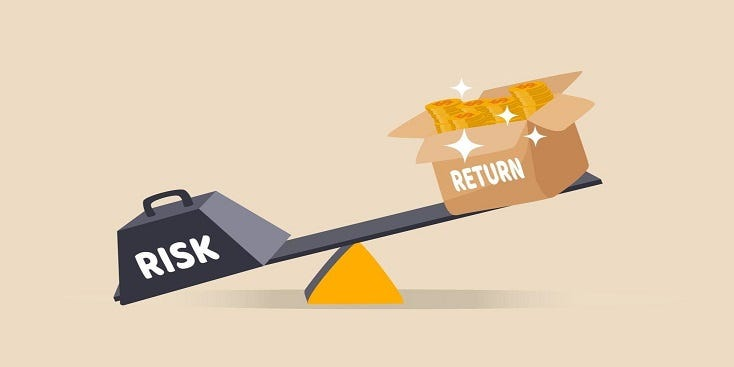

O índice ou modelo CAPM (também conhecido como Alfa) é um método usado para precificar ativos. "Precificar algo" neste contexto estamos no referindo a inferir um retorno mínimo aceitável que deve-se aceitar para colocar seu dinheiro em um ativo tendo em vista o seu risco de mercado (já veremos o que significa "risco de mercado"). Ou de forma mais simples, o modelo CAPM é técnica que usamos para medir o juros que devemos cobrar ao fazer algum investimento (juros sobre investimento também é conhecido como retorno) tendo em vista seu risco.

Por exemplo, digamos que eu sou um investidor e estou procurando um ativo onde eu possa investir e ganhar um retorno desse investimento. A primeira ideia que eu tenho é investir em ações de uma única empresa e viver de rendimentos dela, ou seja, eu não tenho interesse de vender as ações a longo prazo (isso é muito comum nos EUA onde investidores fazem seu plano de aposentadoria com o dinheiro que eles guardam de dividendos). Na minha procura de empresas que pagam dividendos eu encontro uma empresa com as seguintes características:
Retorno Esperado da Empresa: 12% ao ano.
Risco sistêmico (ou risco de mercado) da Empresa: 150% ou 1.5

O risco sistêmico/mercado da empresa ser de 150% (ou 1,5) significa que, se a IBOVESPA variar 60% os ativos da empresa vão variar 90%, se a IBOVESP variar -20% os ativos da empresa vão variar -30%. Isto é, essa empresa vai variar 50% a mais da variação do mercado local no mesmo período.
Ou seja, para esse exemplo, podemos afirmar que os ativos dessa empresa são mais voláteis que o mercado local (IBOVESPA é um índice do mercado brasileiro).
Digamos que naquele momento a taxa Selic (investimento seguro) me dá um retorno de 6% com risco 0.


Lembre-se que, na maioria das vezes o investimento mais seguro dentro de um pais é o tesouro nacional… Ou seja, o risco é considerado zero. E sim… Investir em ativos do governo é mais seguro que guardar dinheiro na poupança.
Sabendo disso quero saber se vale a a pena ganhar um retorno anual de 12% com os dividendos tomando um risco sistêmico de 150% em relação a volatilidade normal do mercado. Neste caso, o que vai me ajudar a ter um parâmetro mínimo de aceitação de rendimento será o modelo de precificação CAPM:
Onde:

- Ri: Retorno mínimo esperado (é o que queremos saber).
- Rf: Retorno free, ou seja, retorno livre de risco. No nosso caso brasileiro é a taxa selic.
- Rm: Retorno esperado do mercado, que pode ser calculado usando o índice Bovespa para o caso brasileiro.
- βi: O Risco Sistêmico/Mercado. No caso brasileiro, o risco de mercado é a relação entre a variação do ativo de interesse e o índice Bovespa (que é um índice de mercado). Matematicamente falando, βi é o coeficiente angular da reta de regressão linear simples entre o ativo e o índice bovespa.

Digamos que a Bovespa deu um retorno anual de 7% no mesmo período, aplicando os dados de exemplo na formula teremos:

- Rf = 6% ao ano.
- Rm = 7% ao ano.
- Bi = 1,5
- Ri = Rf + βi(Rm - Rf) = 8 + 1.5(7–6) = 8 + 1.5 = 9,5

Ou seja, o retorno mínimo aceitável para esse investimento é de 9,5% ao ano, como o investimento tem um retorno esperado de 12% ao ano, podemos concluir que ele tem um bom rendimento.

# Exemplo com Python

Vamos fazer um exemplo utilizando uma ação, isto é, vamos calcular o retorno mínimo aceitavel para compramos ações de uma determinada empresa brasileira. Neste exemplo, vamos analisar empresa WEG (empresa que atual com equipamentos eletroeletrônicos e motores).
A primeira coisa que devemos definir antes de tudo é, qual será o intervalo de tempo que vou usar para fazer minha análise… Neste exemplo eu optei por usar os dois anos pós pandemia (2022 e 2023), isto é, vamos pegar o histórico do preço da ação da WEG começando em 01/01/2022 até 31/12/2023.

##Importando bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
!pip install -q yfinance
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
acoes = ["WEGE3.SA","^BVSP"]

acoes_df = pd.DataFrame()

acoes_df = yf.download(acoes , start='2022-01-01', end= '2023-12-31')['Close']

#Renomemando as colunas
acoes_df.rename(columns={"WEGE3.SA":"WEG", "^BVSP":"BOVESPA"}, inplace = True)
acoes_df

[*********************100%%**********************]  2 of 2 completed


Ticker,WEG,BOVESPA
Date,,
2022-01-03,32.020000,103922.0
2022-01-04,31.860001,103514.0
2022-01-05,30.180000,101006.0
2022-01-06,30.170000,101561.0
2022-01-07,29.410000,102719.0
...,...,...
2023-12-21,36.389999,132182.0
2023-12-22,36.509998,132753.0
2023-12-26,36.720001,133533.0


## Normalizando os valores em relação ao valor inicial

In [5]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns:
  acoes_df_normalizado[i] =  acoes_df_normalizado[i]/acoes_df_normalizado[i][0]
acoes_df_normalizado

Ticker,WEG,BOVESPA
Date,,
2022-01-03,1.000000,1.000000
2022-01-04,0.995003,0.996074
2022-01-05,0.942536,0.971940
2022-01-06,0.942224,0.977281
2022-01-07,0.918488,0.988424
...,...,...
2023-12-21,1.136477,1.271935
2023-12-22,1.140225,1.277429
2023-12-26,1.146783,1.284935


## Calculando o Retorno simples diário

In [6]:
acoes_df_RS = (acoes_df_normalizado/acoes_df_normalizado.shift(1)) - 1
acoes_df_RS

Ticker,WEG,BOVESPA
Date,,
2022-01-03,NaN,NaN
2022-01-04,-0.004997,-0.003926
2022-01-05,-0.052731,-0.024229
2022-01-06,-0.000331,0.005495
2022-01-07,-0.025191,0.011402
...,...,...
2023-12-21,0.006361,0.010535
2023-12-22,0.003298,0.004320
2023-12-26,0.005752,0.005876


In [7]:
acoes_df_RS.fillna(0, inplace=True)#usamos o método do pandas fillna, que como o nome ja diz, ele enche células com NaN
acoes_df_RS                        # Neste caso estamos falando para substituir NaN por 0.

Ticker,WEG,BOVESPA
Date,,
2022-01-03,0.000000,0.000000
2022-01-04,-0.004997,-0.003926
2022-01-05,-0.052731,-0.024229
2022-01-06,-0.000331,0.005495
2022-01-07,-0.025191,0.011402
...,...,...
2023-12-21,0.006361,0.010535
2023-12-22,0.003298,0.004320
2023-12-26,0.005752,0.005876


## Calculando o Retorno Anual Esperado do Ativo e do Mercado

In [13]:
retorno_anual_esperado_mercado = acoes_df_RS['BOVESPA'].mean()*246
retorno_anual_weg = acoes_df_RS['WEG'].mean()*246
print(retorno_anual_esperado_mercado, retorno_anual_weg)

0.14434579400238215 0.11927223226983494


## Calculando o Beta (Risco sistêmico (ou risco de mercado) da Empresa)

In [17]:
beta, _ = np.polyfit(x = acoes_df_RS.BOVESPA, y = acoes_df_RS.WEG, deg = 1)
beta

0.7766619949815908

## Definindo o retorno livre de risco (Selic em 01/01/2024)

In [18]:
retorno_free = 0.1175

## Calculando o Retorno Mínimo Aceitável (ALFA/CAPM)

In [19]:
retorno_minimo = retorno_free + beta*(retorno_anual_esperado_mercado - retorno_free)
retorno_minimo

0.13835010792675495

In [20]:
print('Retorno Mínimo Aceitavel: ', retorno_minimo, " Retorno Esperado do Ativo: ", retorno_anual_weg)

Retorno Mínimo Aceitavel:  0.13835010792675495  Retorno Esperado do Ativo:  0.11927223226983494


Veja que, o ativo (Ações da WEG) não superou o retorno mínimo aceitável, logo a recomendação é de não comprar ações da WEG neste momento (segundo o CAPM de William Sharpe).

***Pontos importantes que vale salientar:***

- **A famosa premissa da análise financeira ainda continua válida! Que é "Observações passadas não garantem que ela vai se repetir no futuro". E lembre-se que o cálculo do retorno mínimo depende de observações passadas…**


- **O valor do retorno mínimo aceitavel é totalmente dependete do intervalo de tempo que usamos para fazer o cálculo, isto é, se pegamos outro intervalo de tempo (4 anos passados por exemplo) o valor retorno mínimo aceitavél também mudará.**